In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
% matplotlib inline

In [2]:
plt.rc('lines', linewidth=6)
plt.rc('font', size=40, family='serif', weight=500)
plt.rc('mathtext', fontset = 'dejavuserif')
plt.rc('axes', linewidth=6, titlepad=20)
plt.rc('patch', linewidth=6)
plt.rc('xtick.major', width=5, size=20)
plt.rc('xtick.minor', width=4, size=15)
plt.rc('ytick.major', width=5, size=20)
plt.rc('ytick.minor', width=4, size=15)
plt.rc('figure.subplot', hspace=0.3, wspace=0.3)

# How far away is Nemesis and when will it arrive?

In the post-game loading screen image, we see the sun set from a view just east of the Base. Above the Sun is a bright dot, which could possibly be Nemesis (or rather, whatever vessel Nemesis is travelling on). If we assume that it has the same apparent magnitude of Venus, we can use this as a foundation for estimating Nemesis's arrival time.

Additionally, during the Singularity mission, Tilda says that Nemesis left Sirius after it learned that the extinction signal failed. The extinction signal was sent 29 years prior to the game and Sirius is 8.6 light-years away, so this tells us how many years it has been since Nemesis departed Sirius.

In [3]:
m_nemesis = -4.14 # mean apparent magnitude of Venus

d_sirius = 8.6 * u.lyr

t_signal = 29 * u.yr

c = u.lyr / u.yr

t_since_departure = t_signal - 2 * d_sirius / c  # time since Nemesis left Sirius

Since we don't know Nemesis's luminosity, we'll use this as an independent variable that we base the rest of the calculations on.

In [4]:
L_nemesis = 10 ** np.linspace(-2.5, 2.2, 100) * u.Lsun # luminosity of Nemesis relative to Sun

Now, we can calculate Nemesis's apparent distance.

First, we'll calculate its absolute magnitude:

$M_{Nemesis} = M_{\odot} - 2.5\log_{10}(L_{Nemesis}/L_{\odot})$

Then, we can calculate its apparent distance:

$d_{Nemesis, apparent} = 10^{(m_{Nemesis} - M_{Nemesis} + 5) / 5}$ parsecs

In [5]:
M_sun = 4.74 # absolute magnitude of the Sun

M_nemesis = M_sun - 2.5 * np.log10(L_nemesis / u.Lsun) # absolute magnitude of Nemesis

d_nemesis_apparent = (10 ** ((m_nemesis - M_nemesis + 5) / 5) * u.pc).to(u.lyr)

The apparent distance here is important. If this distance is 3 light-years, that is where Nemesis was 3 years ago!

We can use this information to calculate Nemesis's average speed. Continuing with the example of a distance of 3 light-years, that means it has travelled 5.6 light-years in 8.8 years. So, its average speed is 0.636 light-years per year (this unit is the speed of light).

In [6]:
t_light_travel_time = d_nemesis_apparent / c

t_travel_apparent = t_since_departure - t_light_travel_time

v_nemesis = (d_sirius - d_nemesis_apparent) / t_travel_apparent

Now that we have Nemesis's speed, we can calculate its actual distance from us. For example, if the apparent distance is 3 light-years, then Nemesis has travelled an additional 1.91 light-years in those 3 years.

With the actual distance to Nemesis, we can now calculate how long it will take to arrive.

In [7]:
d_nemesis_actual = d_nemesis_apparent - v_nemesis * t_light_travel_time

t_until_arrival = d_nemesis_actual / v_nemesis

# How far away is Nemesis

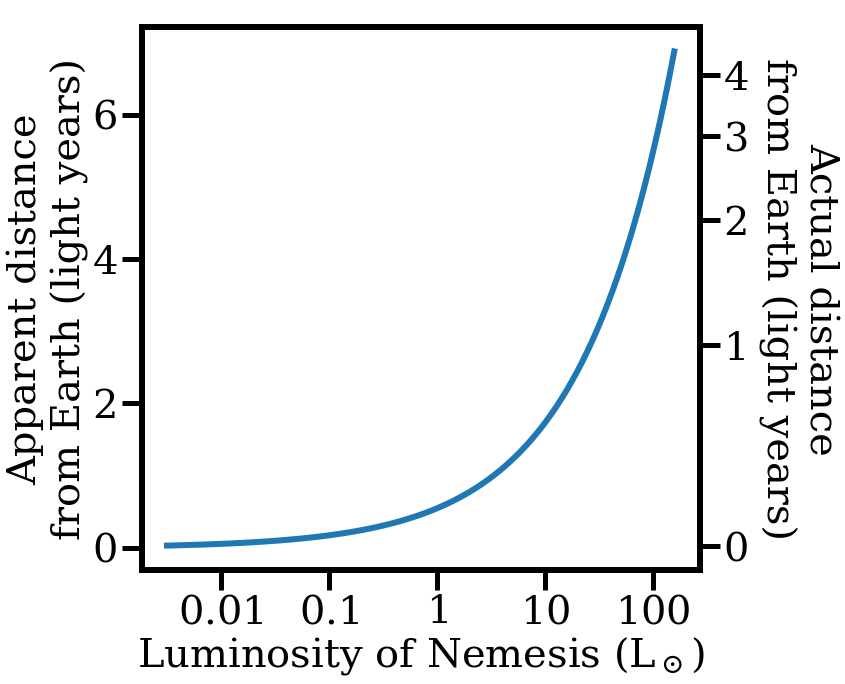

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.semilogx(L_nemesis, d_nemesis_apparent, '-')
ax.set_xlabel("Luminosity of Nemesis (L$_\odot$)")
ax.set_ylabel("Apparent distance\nfrom Earth (light years)")

ax.set_xticks([0.01, 0.1, 1, 10, 100])
ax.set_xticklabels(['$0.01$','$0.1$','$1$','$10$','$100$'])

ax2 = ax.twinx()
ax2.set_ylabel("Actual distance\nfrom Earth (light years)", rotation=270, labelpad=90)
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(np.interp([0, 1, 2, 3, 4], d_nemesis_actual, d_nemesis_apparent))
ax2.set_yticklabels(['$0$','$1$','$2$','$3$','$4$'])

plt.savefig("nemesis-distance.png", bbox_inches='tight')

This plot shows the distance to Nemesis (in light-years) as a function of its luminosity (relative to the Sun). Note that the horizontal axis is in a logarithmic scale (powers of ten) and the vertical axis is in a linear scale.

The left-hand side of the vertical axis shows the apparent distance and the right-hand side shows the actual distance. Note that the closer Nemesis is to Earth, the more similar these values will be. This is because it has taken less time for the light to reach Earth. Conversely, the further away Nemesis is to Earth, the greater the difference between the two. This is because it has taken more time for the light to reach Earth. 

What's important here? If Nemesis is any appreciable distance from Earth (i.e. more than say 1 light-year away), then it must be absurdly luminous - much brighter than the Sun!

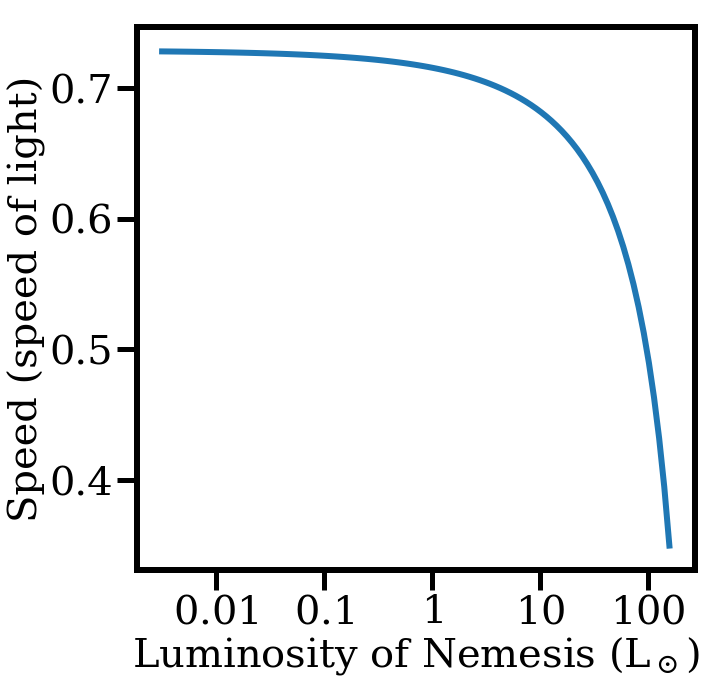

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.semilogx(L_nemesis, v_nemesis, '-')

ax.set_xlabel("Luminosity of Nemesis (L$_\odot$)")
ax.set_ylabel("Speed (speed of light)")

ax.set_xticks([0.01, 0.1, 1, 10, 100])
ax.set_xticklabels(['$0.01$','$0.1$','$1$','$10$','$100$'])

plt.savefig("nemesis-speed.png", bbox_inches='tight')

This plot shows the average speed of Nemesis (relative to the speed of light) as a function of its luminosity (relative to the Sun). Note that the horizontal axis is in a logarithmic scale (powers of ten) and the vertical axis is in a linear scale.

What's important here? There isn't much difference in the speed until Nemesis's luminosity becomes greater than about $10L_{\odot}$ (i.e. it's very far from Earth). Assuming that The Zeniths left Sirius around the same time as the extinction signal was sent, then their average speed was $0.3c$. It would seem that Nemesis has used their printing facilities to construct a vessel that can travel faster than theirs!

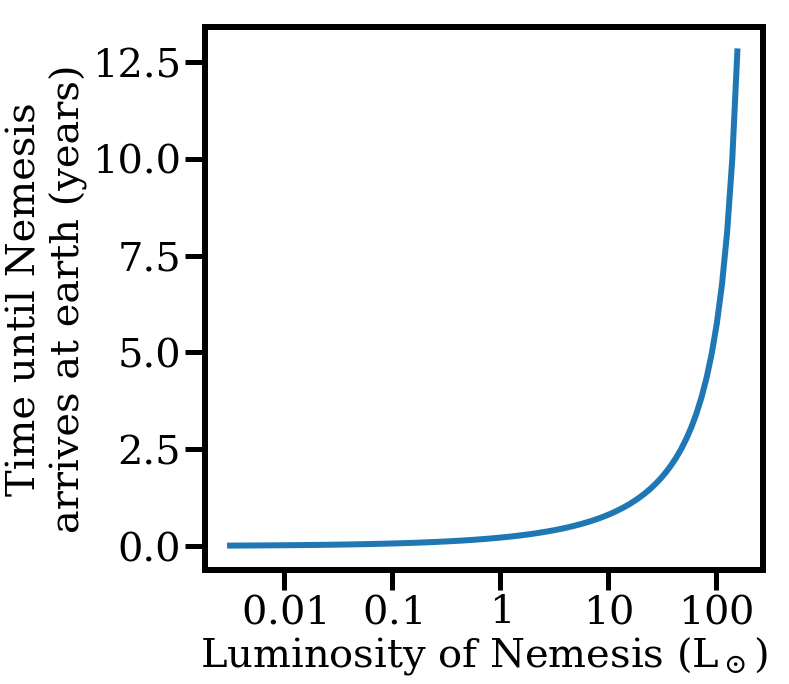

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.semilogx(L_nemesis, t_until_arrival, '-')

ax.set_xlabel("Luminosity of Nemesis (L$_\odot$)")
ax.set_ylabel("Time until Nemesis\narrives at earth (years)")

ax.set_xticks([0.01, 0.1, 1, 10, 100])
ax.set_xticklabels(['$0.01$','$0.1$','$1$','$10$','$100$'])

plt.savefig("nemesis-arrival-time.png", bbox_inches='tight')

This plot shows the time until Nemesis arrives at Earth (in years) as a function of its luminosity (relative to the Sun). Note that the horizontal axis is in a logarithmic scale (powers of ten) and the vertical axis is in a linear scale.

What's important here? In the datapoint "HEPHAESTUS Revisited", Beta implies that Nemesis is at least one year away. This means that Nemesis has a luminosity of at least $14L_{\odot}$. This is absurd!

I think it's safe to say that if the post-game loading screen image is showing Nemesis, then it's just symbolic to remind us of the looming danger.